# Exploratory effects of Ford GoBike characteristics on durations

## by (Rofiah Adeshina)

## Introduction
>This document explores a dataset containing the trip data of 183,412 trips of ford gobike sustainable bike sharing system in the San-Fransisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#load the data
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#overview of data shape 
bike_data.shape

(183412, 16)

In [4]:
# high-level overview of data composition
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
#summary statistics of data
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183412 bike trips recorded in the dataset with 16 features recorder per trip. These features cover the these areas:
> * time of the ride 
> * the location of the ride  
> * information about the bike and it's rider

**N.B Some features have the wrong data type (start_time and end_time) this will be sorter first**

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the duration of the trips and I would like to explore how other features affect this.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features like `user_type`, `members age`,	`member_gender`, `period of day (day/night)` will have effects on trip durations 

### Data Cleaning
Define: convert start_time and end_time to datetime datatype

In [6]:
#Code

bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])

bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [7]:
#test
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Feature Engineering
> One of the features of interest member age is not readily available and needs to be engineered

In [8]:
bike_data['end_time'].describe(datetime_is_numeric=True)

count                           183412
mean     2019-02-15 21:20:05.668533504
min         2019-02-01 00:04:52.058000
25%      2019-02-08 08:42:17.385500160
50%         2019-02-15 23:17:22.168000
75%      2019-02-22 11:14:24.885750016
max         2019-03-01 08:01:55.975000
Name: end_time, dtype: object

In [9]:
# engineer the member's age
bike_data['current_year'] = bike_data['end_time'].dt.year

In [10]:
# age = current year - members birth year
bike_data['member_age'] = bike_data['current_year'] - bike_data['member_birth_year']

In [11]:
#member age created as a feature
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
current_year                        int64
member_age                        float64
dtype: object

> Another feature of interest is the `period of day` this will be splitted into the columns `weekday`, and `trip_period`-`[morning, afternoon or night]`,  

In [18]:
# create weekday column
bike_data['weekday'] = bike_data['start_time'].dt.day_name().str.slice(stop=3)

In [17]:
bike_data['start_time'].dt.day_name().str.slice(stop=3).value

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
183407    Fri
183408    Fri
183409    Fri
183410    Fri
183411    Fri
Name: start_time, Length: 183412, dtype: object

In [19]:
#create trip_period column
bike_data['start_hour'] = bike_data['start_time'].dt.hour

bike_data['trip_period'] = 'morning'
bike_data['trip_period'][(bike_data['start_hour'] >= 12) & (bike_data['start_hour'] <= 17)] = 'afternoon'
bike_data['trip_period'][(bike_data['start_hour'] >= 18) & (bike_data['start_hour'] <= 23)] = 'night'

/var/folders/tb/5m13rrhx50xb0b41ydg9ww0h0000gn/T/ipykernel_11857/2682814930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['trip_period'][(bike_data['start_hour'] >= 12) & (bike_data['start_hour'] <= 17)] = 'afternoon'
/var/folders/tb/5m13rrhx50xb0b41ydg9ww0h0000gn/T/ipykernel_11857/2682814930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['trip_period'][(bike_data['start_hour'] >= 18) & (bike_data['start_hour'] <= 23)] = 'night'


In [20]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019,35.0,Thu,17,afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2019,NaN,Thu,18,night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019,47.0,Thu,12,afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019,30.0,Thu,17,afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019,45.0,Thu,23,night


In [44]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'trip_period': ['morning', 'afternoon', 'night'],
                    'weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike_data[var] = bike_data[var].astype(ordered_var)

## Univariate Exploration


### Question 1 : What is the distribution of duration?

> What is the distribution of `duration`?

> I'll first concentrate on the feature of interest **`duration_sec`**


In [23]:
# first look at duration
bike_data['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [111]:
bike_data[bike_data['duration_sec']==85444]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
101361,85444,2019-02-13 17:59:55.124,2019-02-14 17:43:59.954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,...,6168,Subscriber,NaN,NaN,No,2019,NaN,Wed,17,afternoon


In [25]:
np.arange(0, bike_data['duration_sec'].max(0)+60, 60)

array([    0,    60,   120, ..., 85380, 85440, 85500])

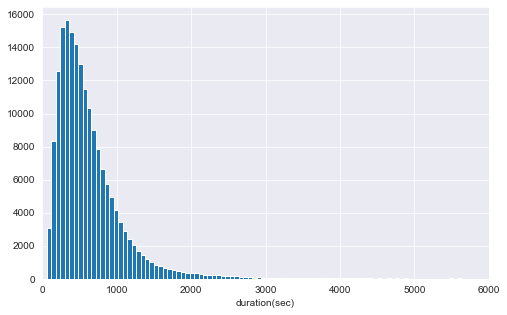

In [26]:
sb.set_style('darkgrid')
bins = np.arange(0, bike_data['duration_sec'].max(0)+60, 60)
plt.figure(figsize=[8, 5])
plt.hist(data=bike_data, x='duration_sec', bins=bins);
plt.xlim(0,6000)
plt.xlabel('duration(sec)');

Text(0.5, 0, 'duration(sec)')

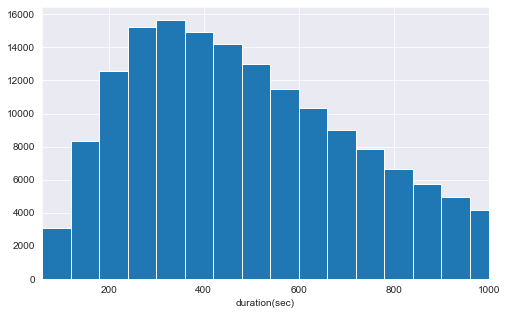

In [27]:
# taking a closer look
sb.set_style('darkgrid')
bins = np.arange(0, bike_data['duration_sec'].max(0)+60, 60)
plt.figure(figsize=[8, 5])
plt.hist(data=bike_data, x='duration_sec', bins=bins);
plt.xlim(60,1000)
plt.xlabel('duration(sec)')

In [28]:
np.log10( bike_data['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

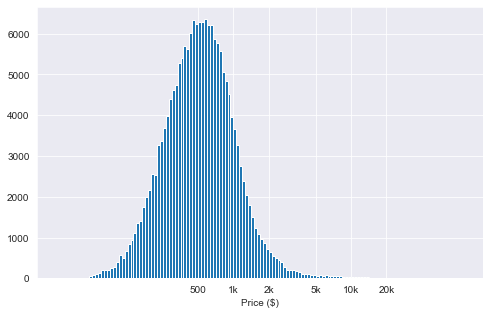

In [29]:
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.show()

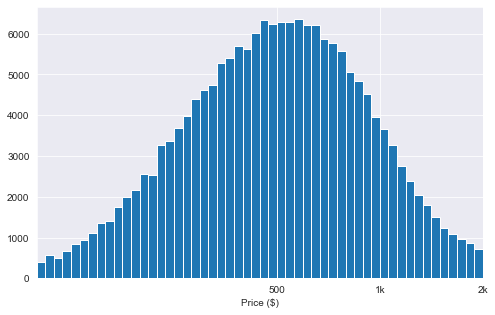

In [30]:
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.xlim(100, 2000)
plt.show()

> Clearly the duration is skewed to the right. Most rides are 2 - 20 minutes long. When plotted on a log-scale, the price distribution looks roughly unimodal.

Next up first feature of interest `user_type`

### Question 2 : What is the distribution of user type?
Does User Type affect the duration of the rides?

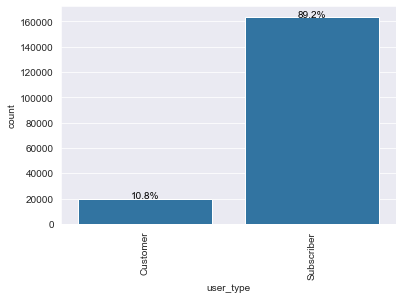

In [31]:
# let's view the user_type distribution
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'user_type', color = default_color);

# Count the frequency of unique values in the `user_type` column of bike_data dataframe.
type_counts = bike_data['user_type'].value_counts()

# Returns the sum of all not-null values in `user_type` column
n_members = bike_data['user_type'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_members)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

> Most of the riders are subscribers and therefore members of the Ford Gobike-sharing system. Only 10.8% of the users 
are customers

### Question 3 : What is the distribution of users age?

In [32]:
# first look at member_age
bike_data['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

> The maximum age is 141 this is odd as a 141 years old person cannot ride a bike. Let's take a closer look at this data

In [33]:
# a closer look at this data
bike_data[bike_data['member_age']==141]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,...,6436,Customer,1878.0,Female,No,2019,141.0,Mon,9,morning


> This user's member_birth_year is 1878. This indicates that the data inaccuracy as it should be 1978 

In [34]:
# change year from 1878 to 1978
bike_data['member_birth_year'] = bike_data['member_birth_year'].replace(1878,1978)

In [35]:
# Test
bike_data[bike_data['member_age']==141]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,...,6436,Customer,1978.0,Female,No,2019,141.0,Mon,9,morning


In [36]:
# replace the age of this data inaccuracy to the appropriate age of 41
bike_data['member_age'] = bike_data['member_age'].replace(141,41)

In [37]:
#test
bike_data[bike_data['end_time']=='2019-02-25 09:53:17.068']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,...,6436,Customer,1978.0,Female,No,2019,41.0,Mon,9,morning


In [38]:
np.arange(0, bike_data['member_age'].max(0)+10, 10)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120.])

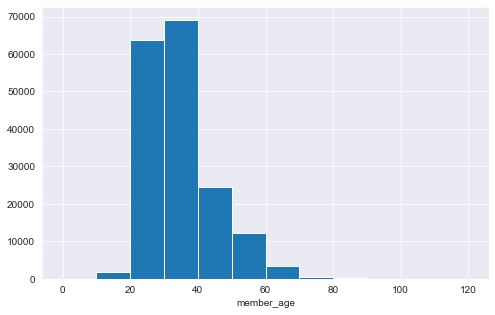

In [39]:
sb.set_style('darkgrid')
bins = np.arange(0, bike_data['member_age'].max(0)+10, 10)
plt.figure(figsize=[8, 5])
plt.hist(data=bike_data, x='member_age', bins=bins);
plt.xlabel('member_age');

> The age is a little skewed to the right. Most riders are in their 20s - 40s with a small proportion above 60

### Question 4 : What is the distribution of members' gender?

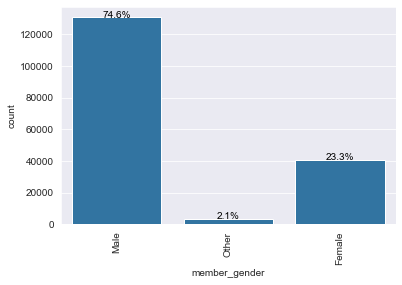

In [40]:
# let's view the user_type distribution
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'member_gender', color = default_color);

# Count the frequency of unique values in the `user_type` column of bike_data dataframe.
type_counts = bike_data['member_gender'].value_counts()

# Returns the sum of all not-null values in `user_type` column
n_genders = bike_data['member_gender'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_genders)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

> The male gender account for a high percentage (74.6%) of the riders, followed by the female riders (23.3%), while those with other gender identity account for only 2.1% of the entire riders.

### Question 5 : What is the distribution of bike_share_for_all_trip?

Most riders don't use the bike sharing service for all their trips 

### Question 5 : What is the distribution of weekday and trip_period?

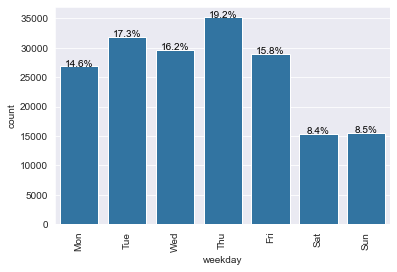

In [45]:
# let's view the user_type distribution
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'weekday', color = default_color);

# Count the frequency of unique values in the `user_type` column of bike_data dataframe.
type_counts = bike_data['weekday'].value_counts()

# Returns the sum of all not-null values in `user_type` column
n_alltrip = bike_data['weekday'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_alltrip)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

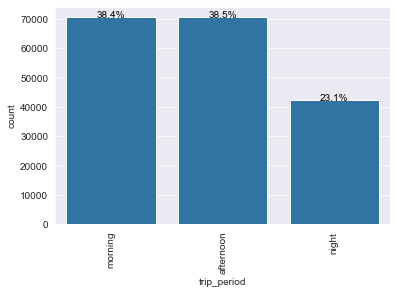

In [46]:
# let's view the user_type distribution
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'trip_period', color = default_color);

# Count the frequency of unique values in the `user_type` column of bike_data dataframe.
type_counts = bike_data['trip_period'].value_counts()

# Returns the sum of all not-null values in `user_type` column
n_alltrip = bike_data['trip_period'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_alltrip)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

Most trips are taken in the weekday during the morning/afternoon period

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration varable was skewed to the right with a long tail, so I used log-scale to transform the data. On this scale the price distribution looked roughly unimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I converted start_time and end_time to datetime datatype as they were given the incorrect data type of string.

> I also engineered 3 new features member_age, weekday and trip_period to aid analysis in to variable to interest member_age and period of trip

>When exploring the age variable the max age of 141 years was off for a user who rides a bike. This was due to the inaccuracy in member_birth_year which was is 1878 instead of 1978. The age 141 was replaced with the age 41. 

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in your data.

In [107]:
num_vars = ['duration_sec','start_station_latitude','start_station_longitude', 
            'end_station_latitude','end_station_longitude','member_birth_year','member_age']

cat_vars = ['user_type', 'member_gender', 'weekday', 'trip_period' ]

> Let's consider the relationship between age and duration

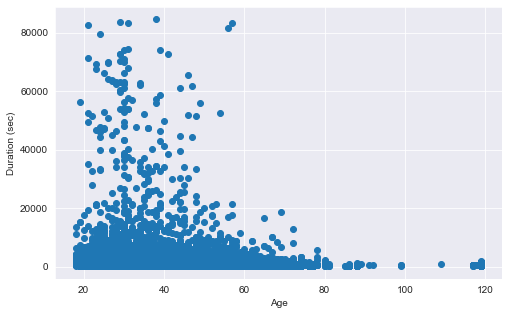

In [50]:
# correlation plot
plt.figure(figsize = [8, 5])
plt.scatter(data=bike_data, x='member_age', y='duration_sec')
plt.xlabel('Age')
plt.ylabel('Duration (sec)');


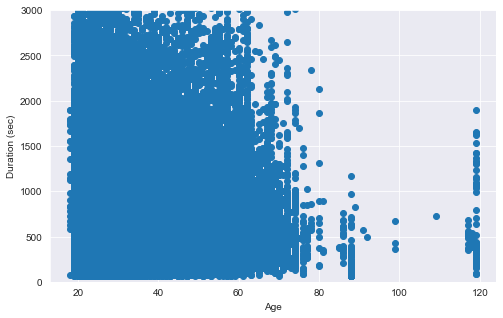

In [108]:
# correlation plot
plt.figure(figsize = [8, 5])
plt.scatter(data=bike_data, x='member_age', y='duration_sec')
plt.ylim(0, 3000)
plt.xlabel('Age')
plt.ylabel('Duration (sec)');

we can see that a large number of the riders are below 50 years and a few are well above 100

In [117]:
above_80k = bike_data[bike_data['duration_sec']>20000]

In [118]:
above_80k['user_type'].value_counts()

Customer      112
Subscriber    103
Name: user_type, dtype: int64

> Let's explore the pairwise relationship between duration and categorical variables of interest

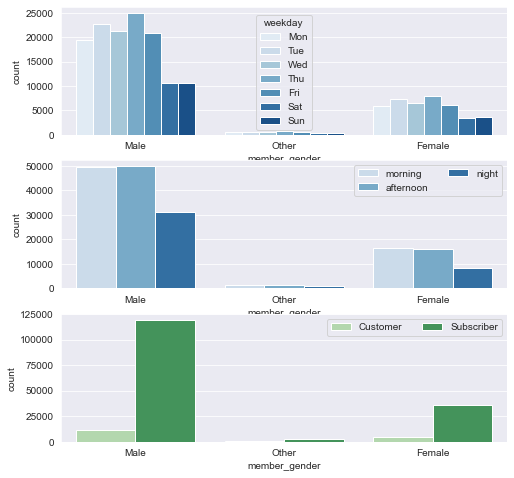

In [90]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = bike_data, x = 'member_gender', hue = 'weekday', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike_data, x = 'member_gender', hue = 'trip_period', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bike_data, x = 'member_gender', hue = 'user_type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> There are more male suscribers and customers than the female/other gender members. They are generally more trips during weekday than there are in weekend

In [96]:
base_color = sb.color_palette()[2]
def boxgrid(var1, var2):
    sb.boxplot(data = bike_data, x = var1, y = var2, color = base_color)   

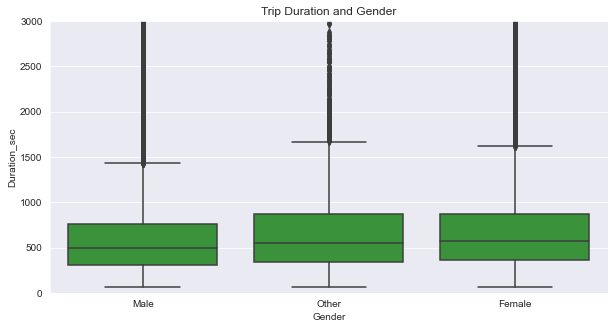

In [103]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
boxgrid('member_gender', 'duration_sec')
plt.ylim([0, 3000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

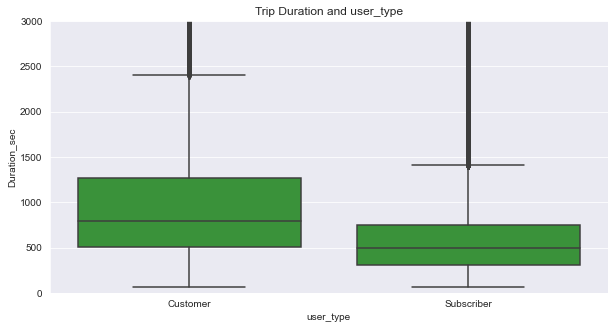

In [104]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
boxgrid('user_type', 'duration_sec')
plt.ylim([0, 3000])
plt.title('Trip Duration and user_type')
plt.xlabel('user_type')
plt.ylabel('Duration_sec')
plt.show()

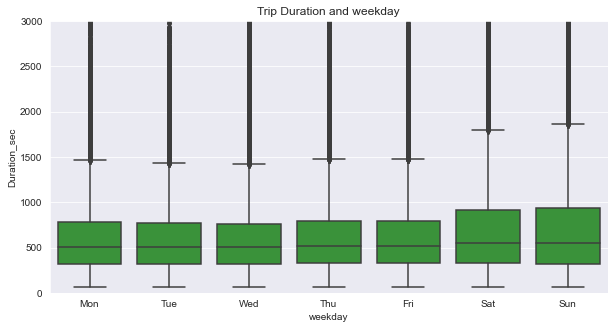

In [101]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
boxgrid('weekday', 'duration_sec')
plt.ylim([0, 3000])
plt.title('Trip Duration and weekday')
plt.xlabel('weekday')
plt.ylabel('Duration_sec')
plt.show()

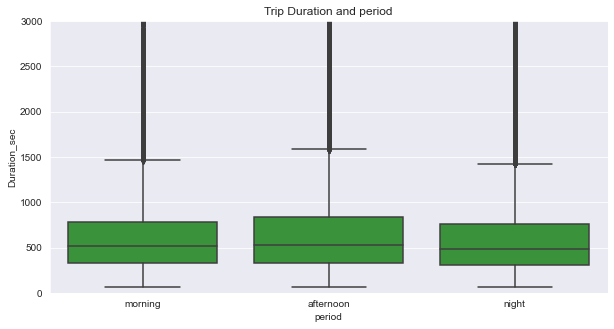

In [105]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
boxgrid('trip_period', 'duration_sec')
plt.ylim([0, 3000])
plt.title('Trip Duration and period')
plt.xlabel('period')
plt.ylabel('Duration_sec')
plt.show()

> Although there are more subscribers than customers, customers take longer trips. This is also same for female and other gender members though there are more male members.

> There are also more trips in the weekend (sat, sun) and afternoon periods. 

<Figure size 576x720 with 0 Axes>

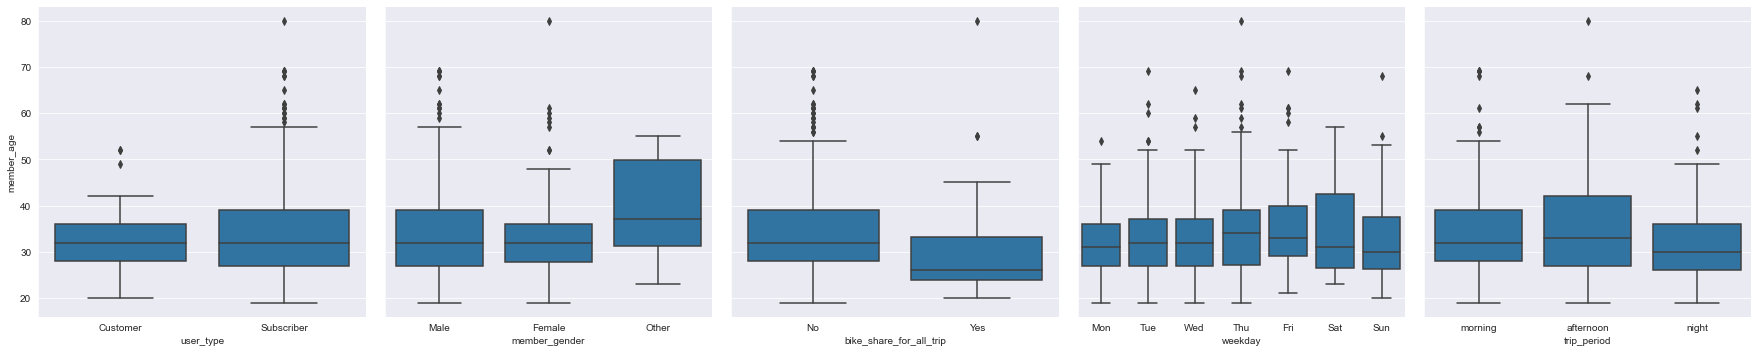

In [106]:
bike_data_samp = bike_data.sample(n=500, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [8, 10])
g = sb.PairGrid(data = bike_data_samp, y_vars = ['member_age'], x_vars = cat_vars,
                height = 5, aspect = 1)
g.map(boxgrid)
plt.title('Age Vs. Categorical Variables')
plt.show();

> Male Members appear to have the widest variety of ages. Averagely there is no significant age difference between subsribers and normal customers.

> Bike durations mostly fall below 40 minutes which is evident accross all variable of interest

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The bike durations are mostly less than 40 minutes occuring during weekdays from morning to afternoon period which reduces towars the night time.

> user_type: Although there are more subscribers than customers, customers take longer trips

> member_age: a large number of the riders below 50 years have high number of trip duration some well above 80000 sec (22 hours) indicating that individuals can rent the bikes for over a day. Only a few are well above 100 and their trip durations below 20 minutes

> member_gender: That female and other gender members take longer trip durations than male members

> period of day: That trips last longer on weekends (sat, sun) and afternoons. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Male Members appear to have the widest variety of ages. Averagely there is no significant age difference between subsribers and normal customers.

## Multivariate Exploration

>

In [123]:
bike_data[bike_data['weekday'].isin(['Sat','Sun'])]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,current_year,member_age,weekday,start_hour,trip_period
28691,37268,2019-02-24 22:14:48.211,2019-02-25 08:35:56.259,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,370.0,Jones St at Post St,37.787327,...,2847,Customer,NaN,NaN,No,2019,NaN,Sun,22,night
29478,42847,2019-02-24 19:34:58.293,2019-02-25 07:29:05.983,234.0,Farnam St at Fruitvale Ave,37.778058,-122.225400,237.0,Fruitvale BART Station,37.775232,...,362,Customer,NaN,NaN,No,2019,NaN,Sun,19,night
29517,42656,2019-02-24 19:35:13.217,2019-02-25 07:26:09.967,234.0,Farnam St at Fruitvale Ave,37.778058,-122.225400,234.0,Farnam St at Fruitvale Ave,37.778058,...,1351,Customer,NaN,NaN,No,2019,NaN,Sun,19,night
29922,70925,2019-02-24 07:08:31.270,2019-02-25 02:50:36.590,375.0,Grove St at Masonic Ave,37.774836,-122.446546,71.0,Broderick St at Oak St,37.773063,...,5282,Subscriber,1989.0,Other,No,2019,30.0,Sun,7,morning
29947,3788,2019-02-24 23:59:28.080,2019-02-25 01:02:36.220,99.0,Folsom St at 15th St,37.767037,-122.415442,386.0,24th St at Bartlett St,37.752105,...,4404,Subscriber,1981.0,Male,Yes,2019,38.0,Sun,23,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177285,115,2019-02-02 00:08:52.710,2019-02-02 00:10:48.519,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,246.0,Berkeley Civic Center,37.869060,...,3482,Subscriber,2000.0,Male,No,2019,19.0,Sat,0,morning
177286,192,2019-02-02 00:06:19.857,2019-02-02 00:09:32.318,109.0,17th St at Valencia St,37.763316,-122.421904,97.0,14th St at Mission St,37.768265,...,5428,Subscriber,1989.0,Male,No,2019,30.0,Sat,0,morning
177287,454,2019-02-02 00:00:23.915,2019-02-02 00:07:58.253,64.0,5th St at Brannan St,37.776754,-122.399018,112.0,Harrison St at 17th St,37.763847,...,4554,Subscriber,1976.0,Female,No,2019,43.0,Sat,0,morning
177288,448,2019-02-02 00:00:27.233,2019-02-02 00:07:55.643,64.0,5th St at Brannan St,37.776754,-122.399018,112.0,Harrison St at 17th St,37.763847,...,4713,Subscriber,1968.0,Male,No,2019,51.0,Sat,0,morning


In [124]:
# select bike rides of weekends
bike_flag = bike_data['weekday'].isin(['Sat','Sun'])
bike_weekend = bike_data.loc[bike_flag,:]

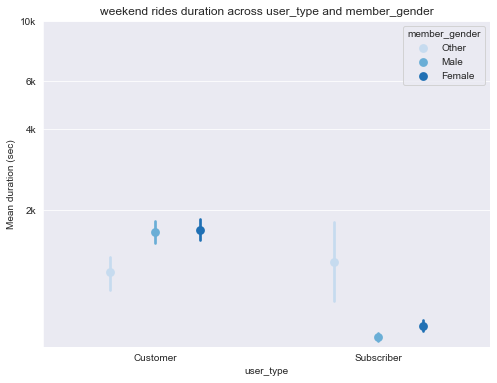

In [126]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_weekend, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('weekend rides duration across user_type and member_gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

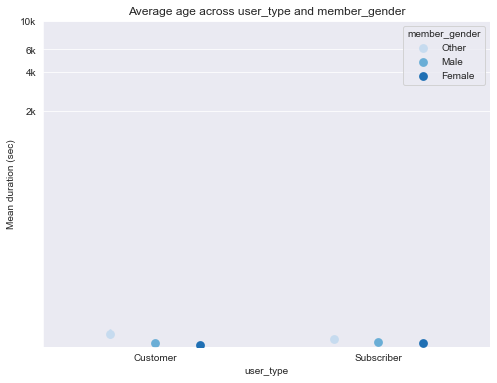

In [133]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_weekend, x = 'user_type', y = 'member_age', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Average age across user_type and member_gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

> During the weekends female customers take longer rides while other gender subcribers take longer rides.

In [127]:
# select bike rides of weekends
bike_fg = bike_data['trip_period'].isin(['afternoon'])
bike_aft = bike_data.loc[bike_fg,:]

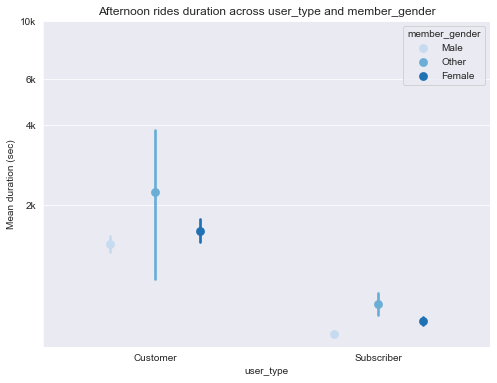

In [128]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_aft, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Afternoon rides duration across user_type and member_gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

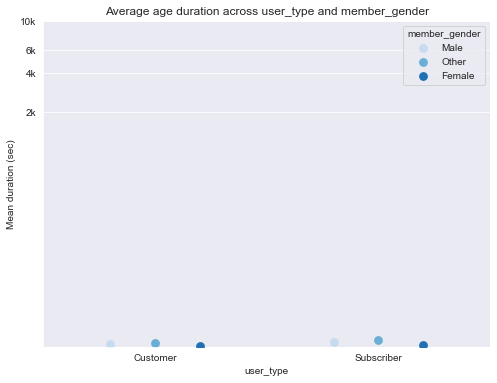

In [134]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_aft, x = 'user_type', y = 'member_age', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Average age duration across user_type and member_gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

The other gender take the most and longest rides in the afternoons

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During the weekends female customers take longer rides, while other-gender subcribers take longer rides than their male/female subcribers.

> The other gender take the most and longest rides in the afternoons

### Were there any interesting or surprising interactions between features?

> There are no significant age difference for customers and subscribers during the weekend/afternoon periods

## Conclusions
> I explored the trip data of 183,412 trips of ford gobike sustainable bike sharing system in the San-Fransisco Bay area. During this analysis, I focused on the duration of the trips explored how other features affect this. I explored the relationship of features like `user_type`, `members age`,	`member_gender`, `period of day (day/night)` with trip durations.

> At the end of the this process, I noted the following:

* Bike durations are mostly less than 40 minutes 
* There are more subscribers than customers but customers take longer trips
* A large number of the riders below 50 years have high number of trip duration some well above 80000 sec (22 hours)
* That female and other gender members take longer trip durations than male members
* That trips last longer on weekends (sat, sun) and afternoons. 
